In [1]:
!pip install missingno

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

In [3]:
# 1. Cargar dataset
df=pd.read_csv("cancer_survival.csv", sep=',', low_memory=False)

In [4]:
# 2. Info del dataset
df.shape

(2000, 10)

In [5]:
df.head()

,Patient_ID,Age,Marital_Status,Year of Operation,Positive_Axillary_Nodes,Tumor_Size,Radiation_Therapy,Chemotherapy,Hormone_Therapy,Survival_Status
0,eca1411e,36,Married,1959,3,1.7,Yes,Yes,No,2
1,63e3301c,39,Married,1966,0,1.6,Yes,No,No,2
2,01647916,71,Single,1964,3,3.1,No,No,No,2
3,07e33840,50,Married,1960,0,3.0,Yes,No,Yes,1
4,ed75da3f,44,Married,1965,4,2.6,Yes,No,No,1


In [6]:
df.tail()

,Patient_ID,Age,Marital_Status,Year of Operation,Positive_Axillary_Nodes,Tumor_Size,Radiation_Therapy,Chemotherapy,Hormone_Therapy,Survival_Status
1995,62a66d96,61,Married,1967,33,2.6,No,No,No,2
1996,0d6864b0,48,Married,1968,31,2.0,Yes,Yes,No,2
1997,305defee,64,Married,1961,43,2.0,Yes,No,No,2
1998,2feb56e9,52,Married,1959,51,2.2,Yes,No,No,2
1999,307791aa,60,Married,1962,33,5.0,Yes,No,No,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               2000 non-null   object 
 1   Age                      2000 non-null   int64  
 2   Marital_Status           2000 non-null   object 
 3   Year of Operation        2000 non-null   int64  
 4   Positive_Axillary_Nodes  2000 non-null   int64  
 5   Tumor_Size               2000 non-null   float64
 6   Radiation_Therapy        2000 non-null   object 
 7   Chemotherapy             2000 non-null   object 
 8   Hormone_Therapy          2000 non-null   object 
 9   Survival_Status          2000 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 156.4+ KB


In [8]:
for column in df.columns:
    num_unique_values = df[column].nunique()
    print(f'Number of unique values in {column}: {num_unique_values}')

Number of unique values in Patient_ID: 2000
Number of unique values in Age: 54
Number of unique values in Marital_Status: 2
Number of unique values in Year of Operation: 12
Number of unique values in Positive_Axillary_Nodes: 52
Number of unique values in Tumor_Size: 46
Number of unique values in Radiation_Therapy: 2
Number of unique values in Chemotherapy: 2
Number of unique values in Hormone_Therapy: 2
Number of unique values in Survival_Status: 2


In [9]:
# 3. Estadística descriptiva
df.describe(include="all")

,Patient_ID,Age,Marital_Status,Year of Operation,Positive_Axillary_Nodes,Tumor_Size,Radiation_Therapy,Chemotherapy,Hormone_Therapy,Survival_Status
count,2000,2000.00000,2000,2000.000000,2000.000000,2000.000000,2000,2000,2000,2000.000000
unique,2000,NaN,2,NaN,NaN,NaN,2,2,2,NaN
top,70d0afae,NaN,Married,NaN,NaN,NaN,Yes,No,No,NaN
freq,1,NaN,1408,NaN,NaN,NaN,1604,1370,1822,NaN
mean,NaN,56.95400,NaN,1963.442000,9.667000,2.764100,NaN,NaN,NaN,1.509000
std,NaN,15.44779,NaN,3.388123,10.407366,1.321701,NaN,NaN,NaN,0.500044
min,NaN,30.00000,NaN,1958.000000,0.000000,0.500000,NaN,NaN,NaN,1.000000
25%,NaN,44.00000,NaN,1961.000000,3.000000,1.600000,NaN,NaN,NaN,1.000000
50%,NaN,57.00000,NaN,1963.000000,6.000000,2.700000,NaN,NaN,NaN,2.000000
75%,NaN,70.00000,NaN,1966.000000,13.000000,3.900000,NaN,NaN,NaN,2.000000


In [10]:
# 4. Limpieza de datos
df.isnull().sum()


,0
Patient_ID,0
Age,0
Marital_Status,0
Year of Operation,0
Positive_Axillary_Nodes,0
Tumor_Size,0
Radiation_Therapy,0
Chemotherapy,0
Hormone_Therapy,0
Survival_Status,0


In [11]:
missing_percentage = df.isnull().mean() * 100
print("Percentage of missing values for each column:")
print(missing_percentage)

Percentage of missing values for each column:
Patient_ID                 0.0
Age                        0.0
Marital_Status             0.0
Year of Operation          0.0
Positive_Axillary_Nodes    0.0
Tumor_Size                 0.0
Radiation_Therapy          0.0
Chemotherapy               0.0
Hormone_Therapy            0.0
Survival_Status            0.0
dtype: float64


<Axes: >

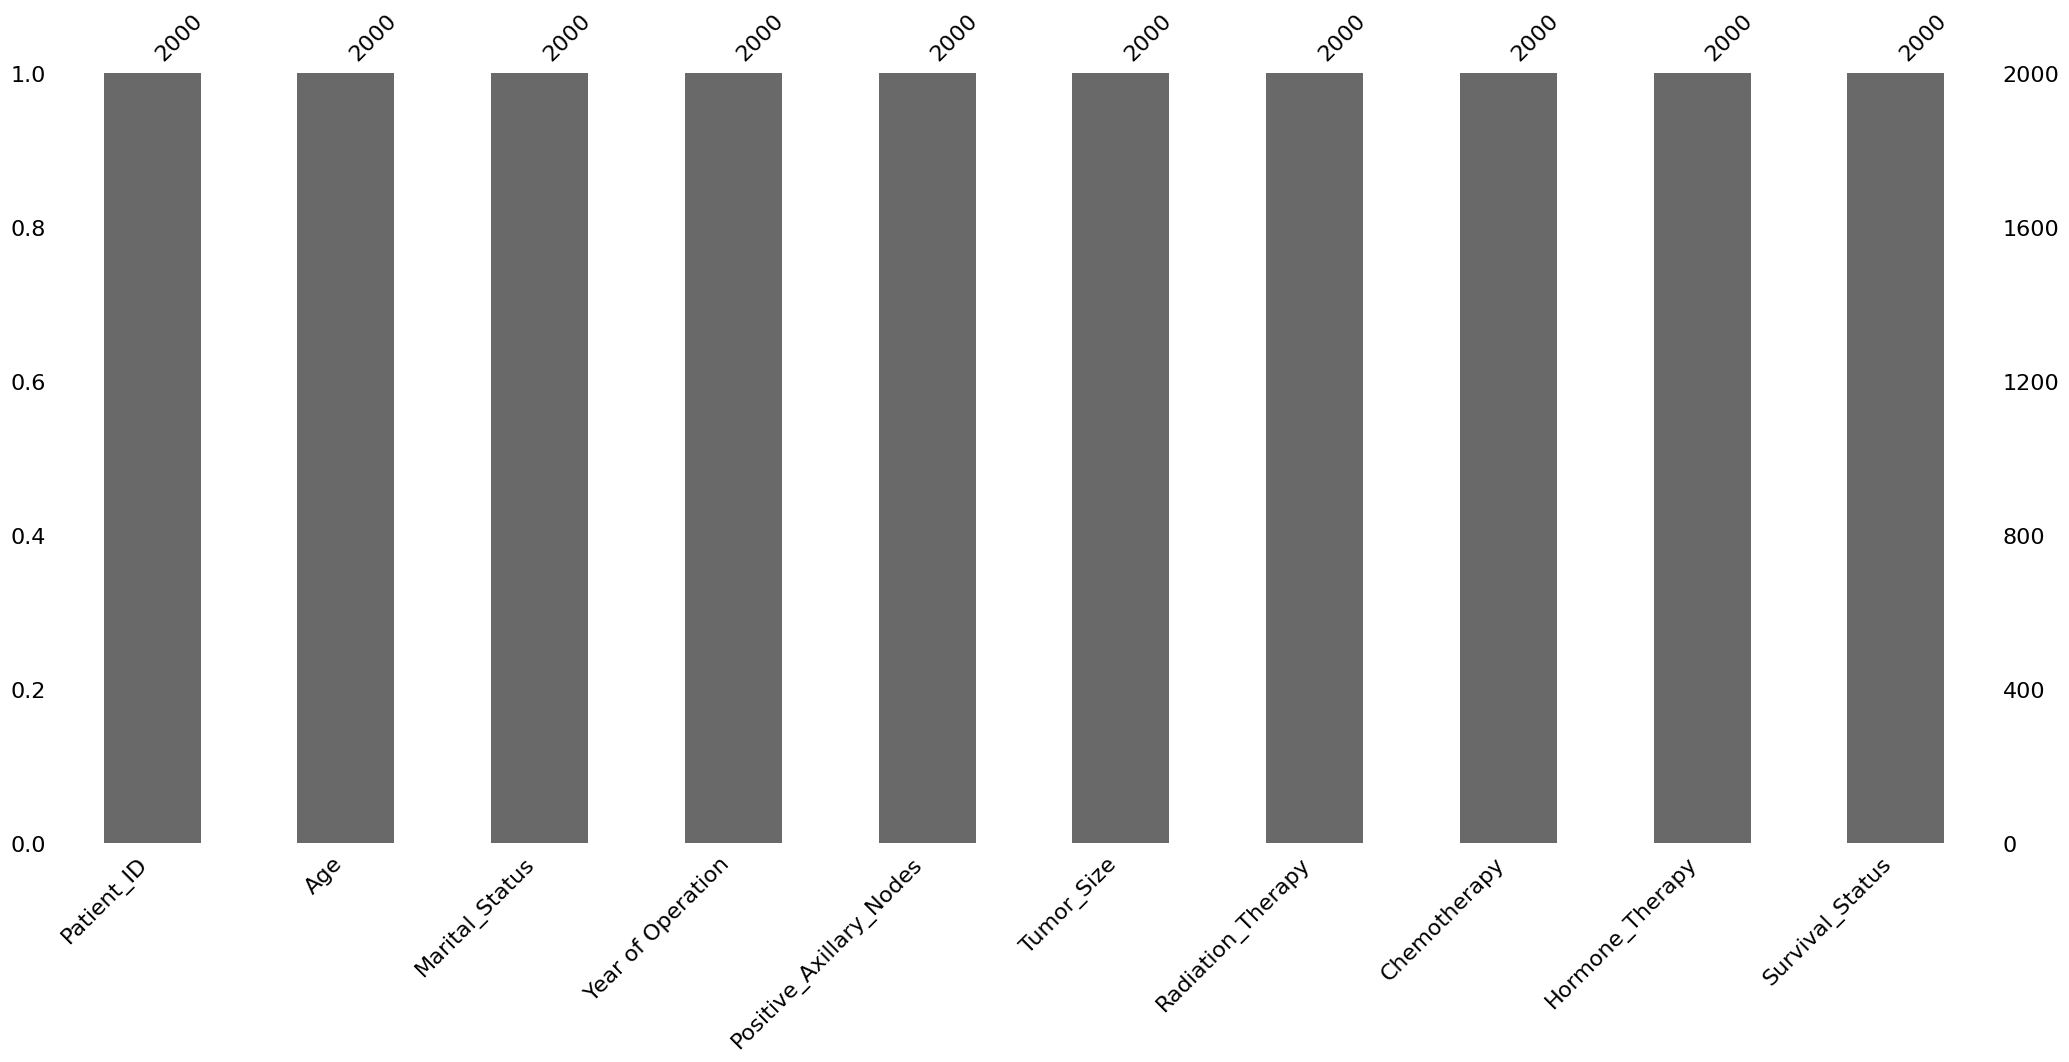

In [12]:
msno.bar(df)

In [13]:
# Imputación de valores pérdidos en age con la media
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [14]:
# Imputación de valores pérdidos en 'Marital_Status' con el modo
df['Marital_Status'].fillna(df['Marital_Status'].mode()[0], inplace=True)

In [15]:
missing_after_imputation = df.isnull().sum()
print("Missing values after imputation:")
print(missing_after_imputation)

Missing values after imputation:
Patient_ID                 0
Age                        0
Marital_Status             0
Year of Operation          0
Positive_Axillary_Nodes    0
Tumor_Size                 0
Radiation_Therapy          0
Chemotherapy               0
Hormone_Therapy            0
Survival_Status            0
dtype: int64


In [16]:
# 5. Remover columnas innecesarias
df = df.drop('Patient_ID', axis=1)

In [17]:
# 6. Remover filas duplicadas
duplicates = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
      Age Marital_Status  Year of Operation  Positive_Axillary_Nodes  \
1008   41         Single               1967                        7   

      Tumor_Size Radiation_Therapy Chemotherapy Hormone_Therapy  \
1008         4.5               Yes           No              No   

      Survival_Status  
1008                1  


In [18]:
# Remover filas duplicadas y actualizar el DataFrame
df_cleaned = df.drop_duplicates()

<Axes: xlabel='Positive_Axillary_Nodes'>

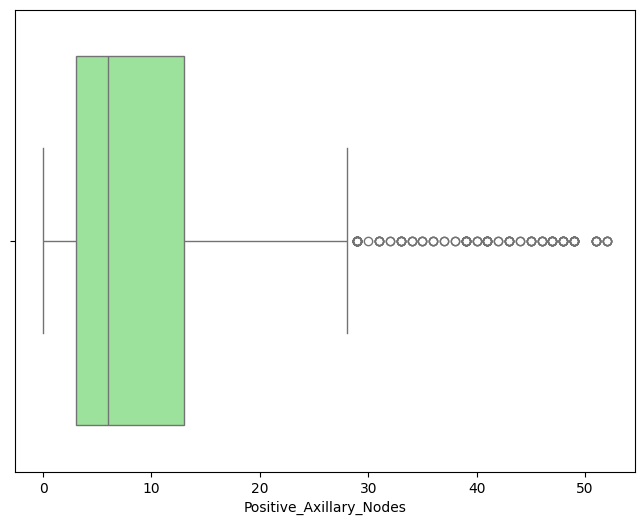

In [19]:
# 7. Detección de outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Positive_Axillary_Nodes'], color='lightgreen')

([<matplotlib.patches.Wedge at 0x79dc53332550>,
 [Text(-0.8817236423561194, -0.6576955363314078, 'Married'),
  Text(0.8817235848585439, 0.6576956134141373, 'Single')],
 [Text(-0.4809401685578833, -0.35874301981713147, '70.4%'),
  Text(0.48094013719556933, 0.35874306186225663, '29.6%')])

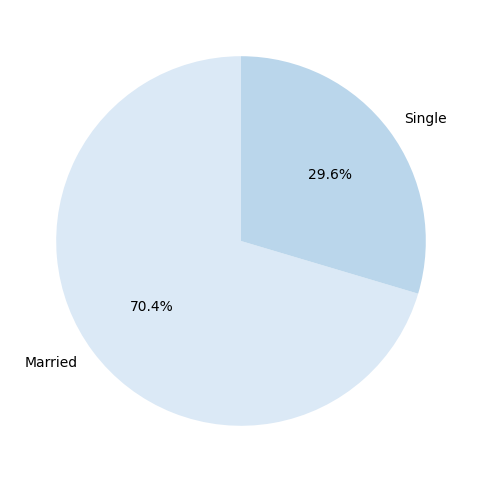

In [20]:
marital_counts = df['Marital_Status'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues'))

In [26]:
label_encoder = LabelEncoder()

df['Radiation_Therapy'] = label_encoder.fit_transform(df['Radiation_Therapy'])
df['Chemotherapy'] = label_encoder.fit_transform(df['Chemotherapy'])
df['Hormone_Therapy'] = label_encoder.fit_transform(df['Hormone_Therapy'])

# Para Marital_Status, tu forma con astype('category').cat.codes está bien:
df['Marital_Status'] = df['Marital_Status'].astype('category').cat.codes


In [22]:
# Calcular z score
z_scores = zscore(df)
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)

In [23]:
# Rango intercuartil
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

<Axes: xlabel='Positive_Axillary_Nodes', ylabel='Count'>

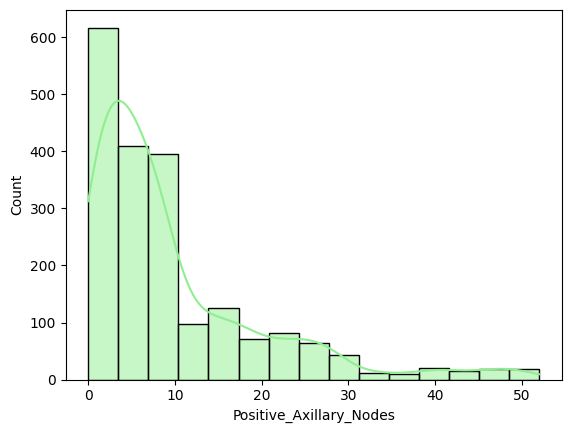

In [24]:
# 8. Análisis univariado
sns.histplot(df['Positive_Axillary_Nodes'], bins=15, kde=True, color='lightgreen')

<Axes: xlabel='Age', ylabel='Proportion'>

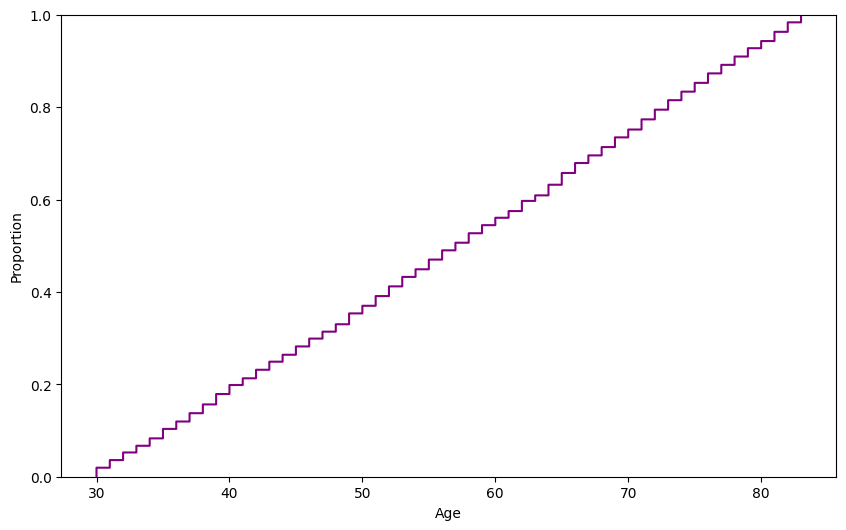

In [25]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(df['Age'], color='purple')

In [27]:
# Computar matriz de correlación
corr_matrix = df.corr()

<Axes: >

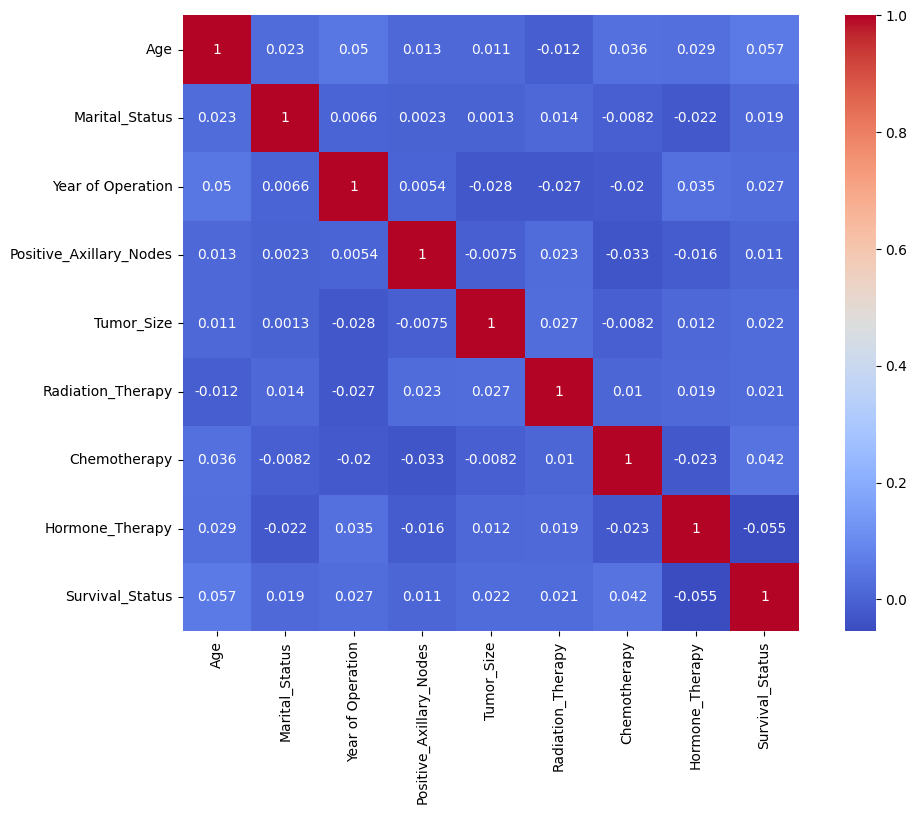

In [28]:
# Generate heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

In [29]:
plt.figure(figsize=(15, 4))

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Axes: xlabel='Survival_Status', ylabel='Positive_Axillary_Nodes'>

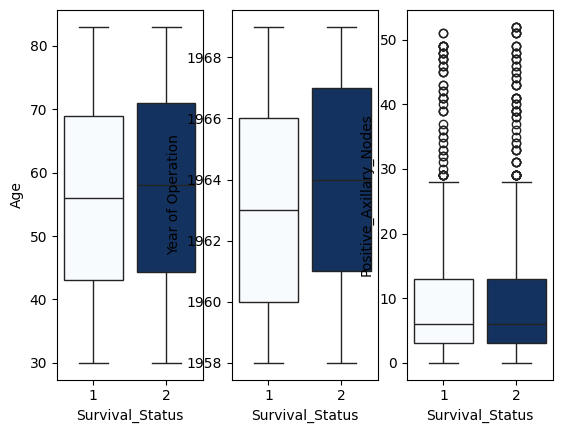

In [30]:
# Subplot 1
plt.subplot(1, 3, 1)
sns.boxplot(x='Survival_Status', y='Age', data=df, hue='Survival_Status', palette='Blues', legend=False)
# Subplot 2
plt.subplot(1, 3, 2)
sns.boxplot(x='Survival_Status', y='Year of Operation', data=df, hue='Survival_Status', palette='Blues', legend=False)
# Subplot 3
plt.subplot(1, 3, 3)
sns.boxplot(x='Survival_Status', y='Positive_Axillary_Nodes', data=df, hue='Survival_Status', palette='Blues', legend=False)

In [31]:
# Variables de interes
selected_features = ['Age', 'Year of Operation', 'Positive_Axillary_Nodes']

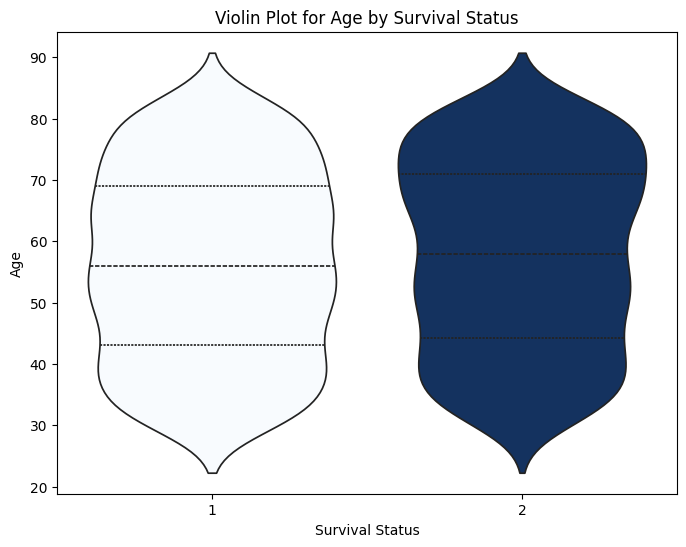

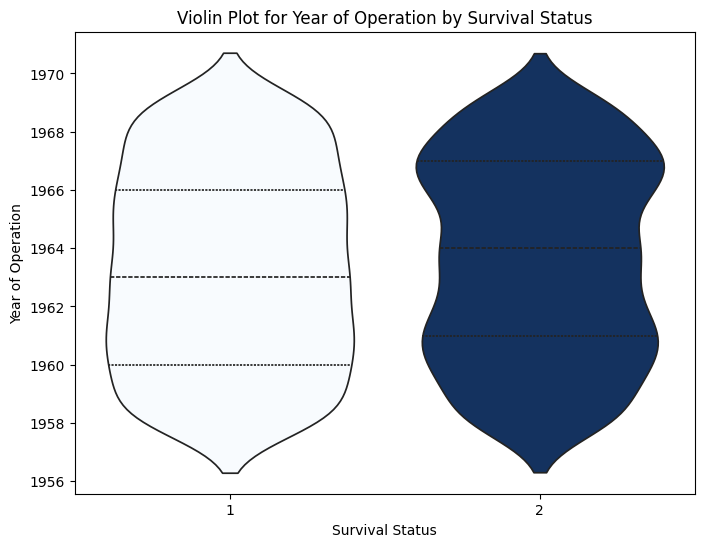

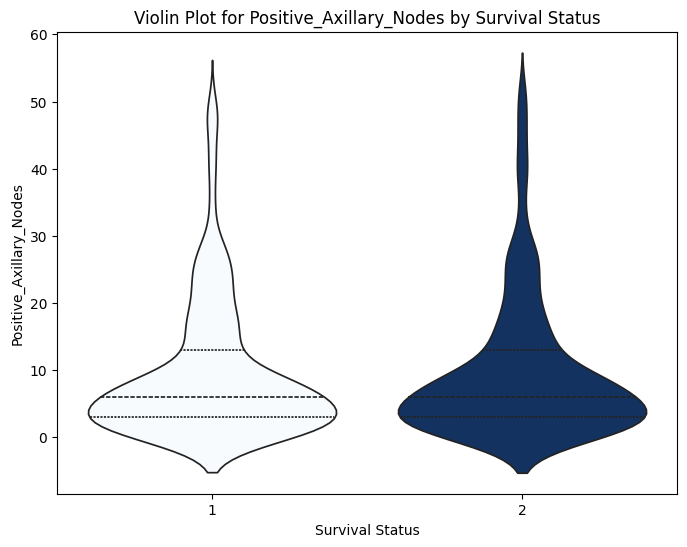

In [32]:
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Survival_Status', y=feature, data=df, hue='Survival_Status', palette='Blues', inner='quartile', legend=False)
    plt.title(f'Violin Plot for {feature} by Survival Status')
    plt.xlabel('Survival Status')
    plt.ylabel(feature)
    plt.show()

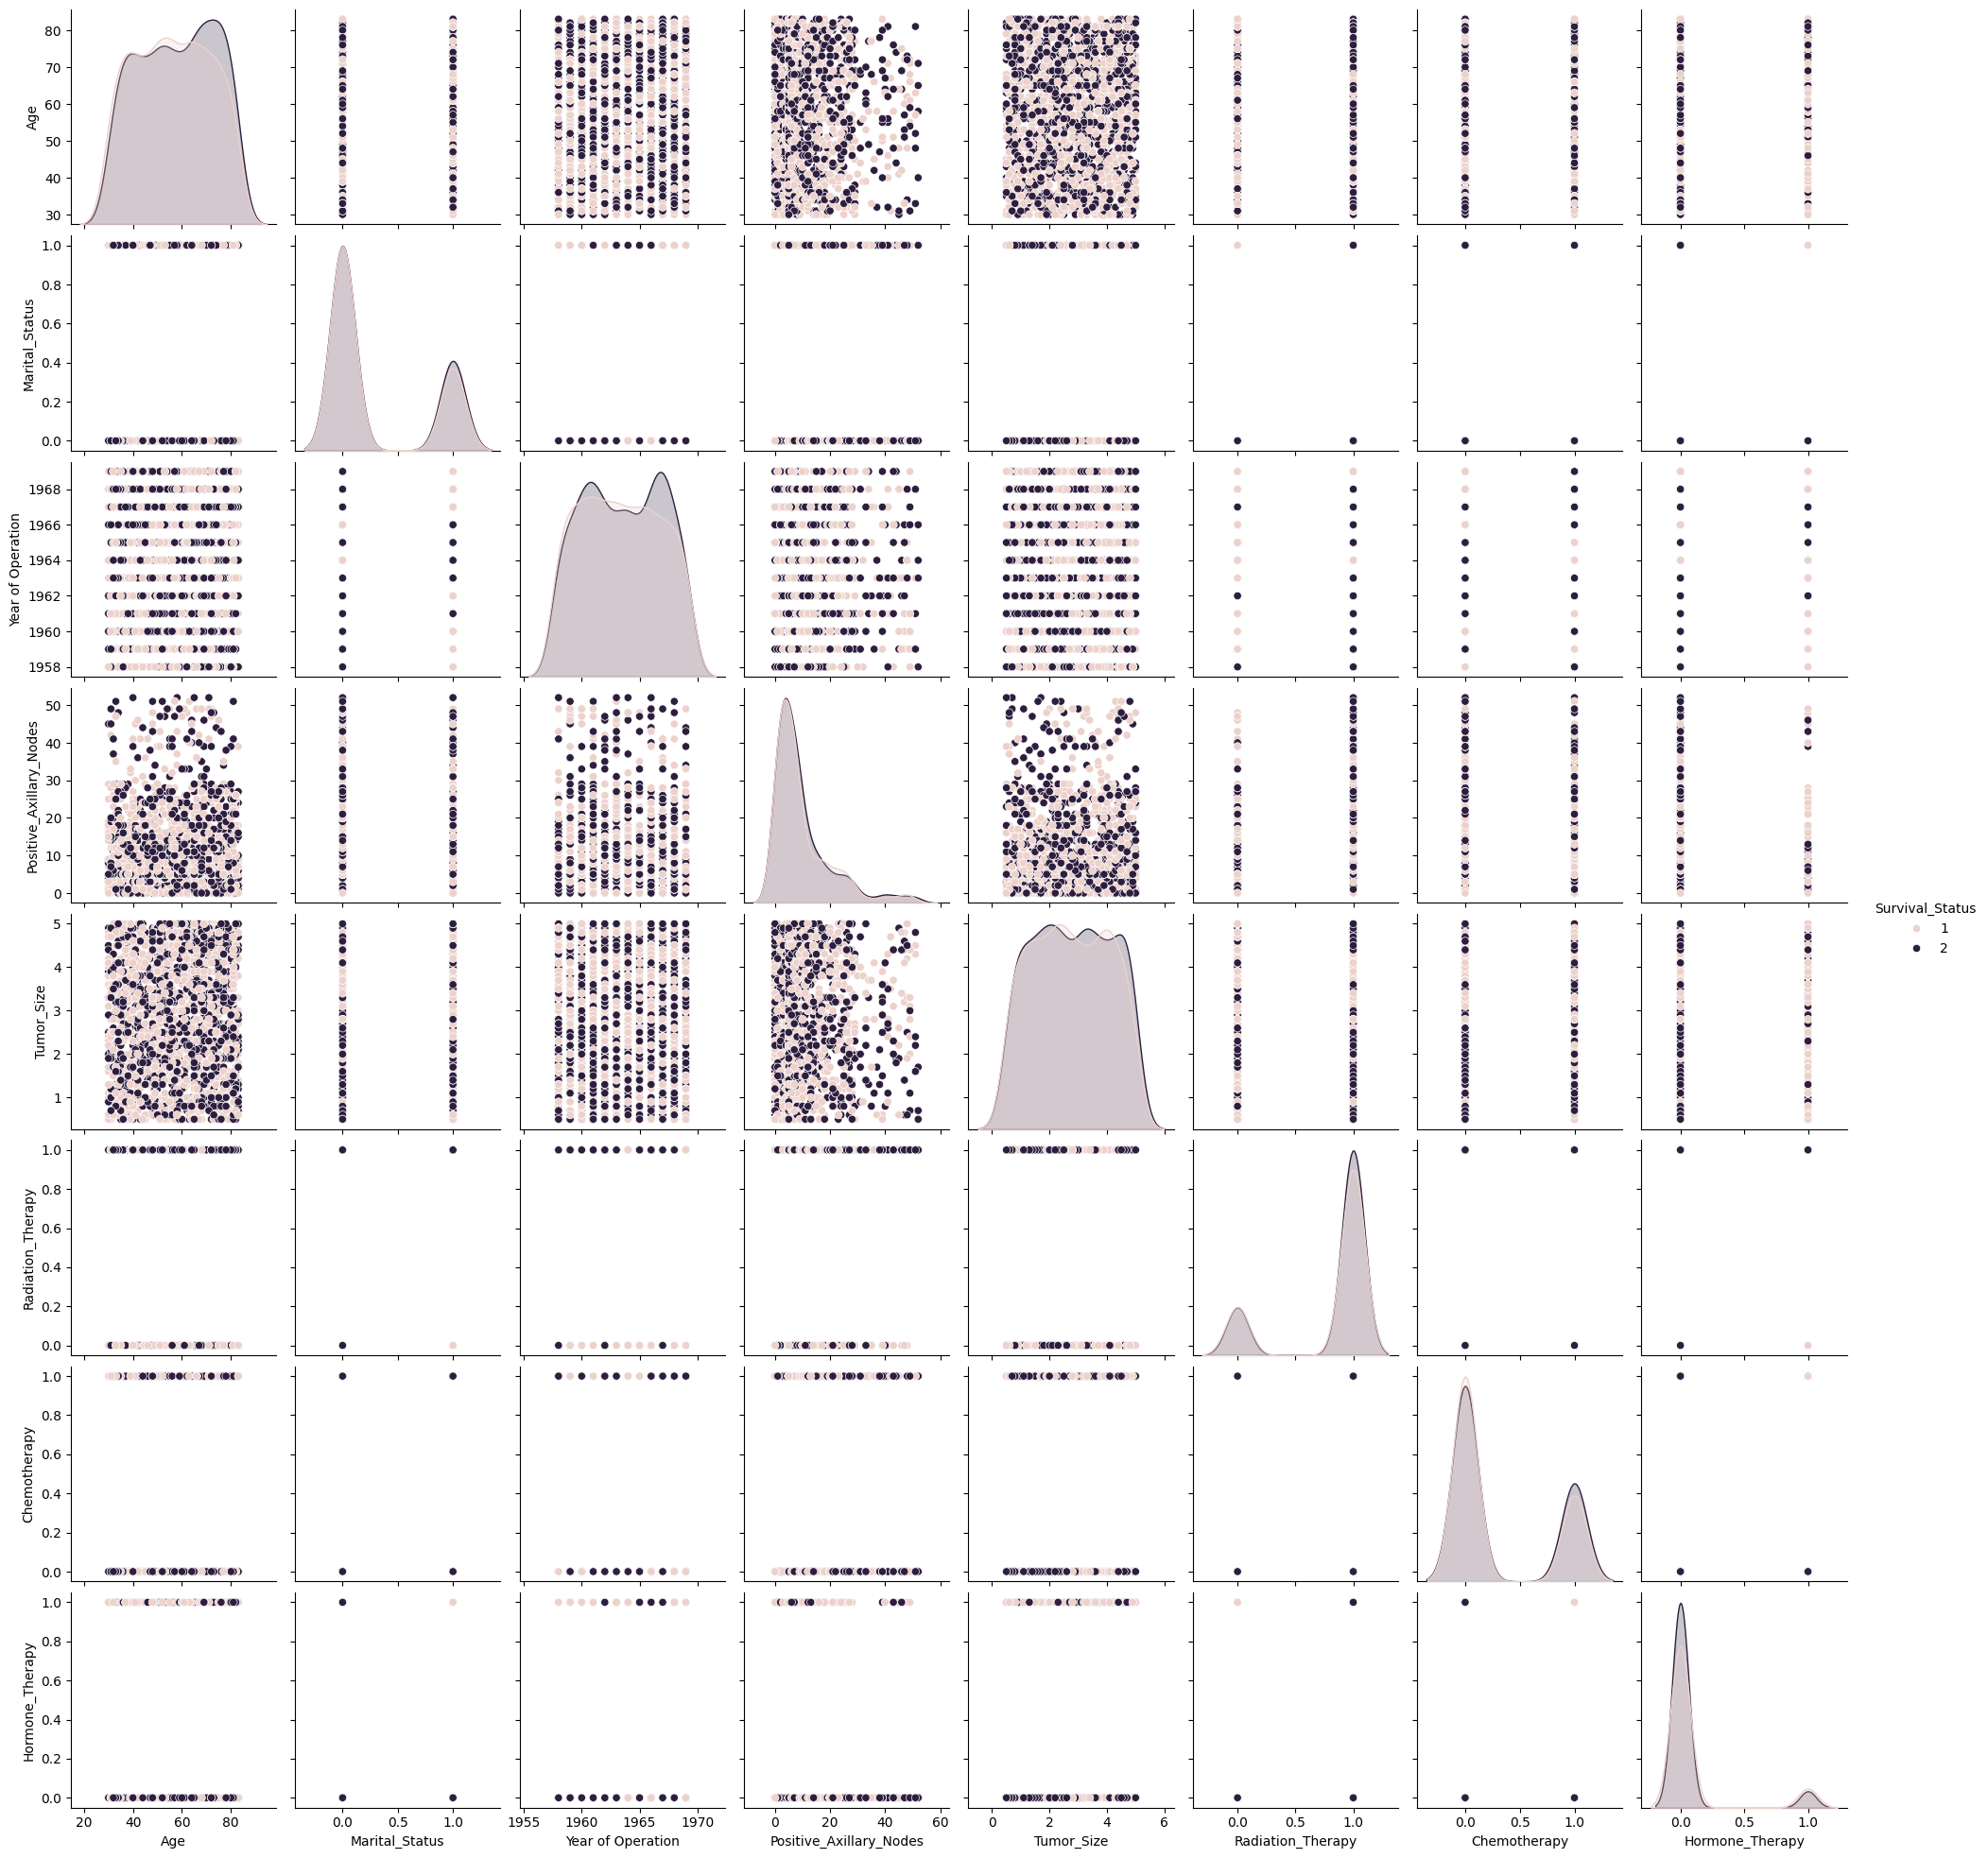

In [33]:
sns.pairplot(df, hue='Survival_Status')

<Axes: xlabel='Tumor_Size', ylabel='Positive_Axillary_Nodes'>

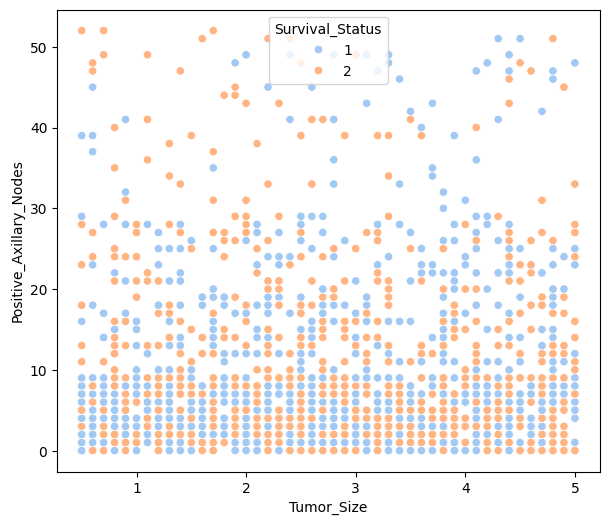

In [34]:
plt.figure(figsize=(7, 6))
sns.scatterplot(x='Tumor_Size', y='Positive_Axillary_Nodes', data=df, hue='Survival_Status', palette='pastel')

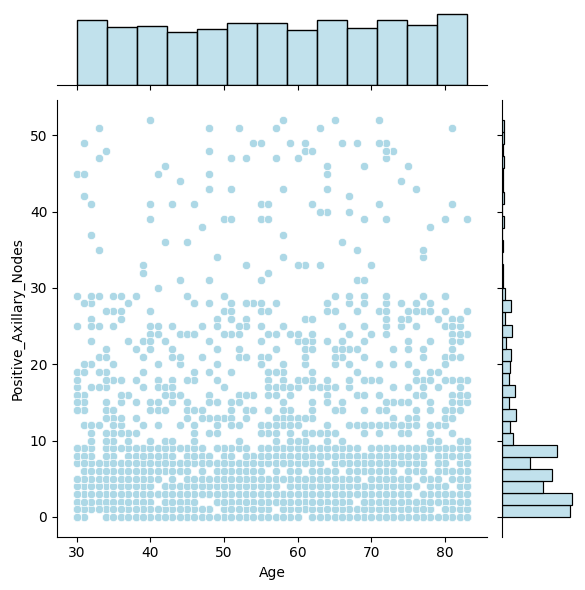

In [35]:
sns.jointplot(x='Age', y='Positive_Axillary_Nodes', data=df,color='lightblue')
plt.show()

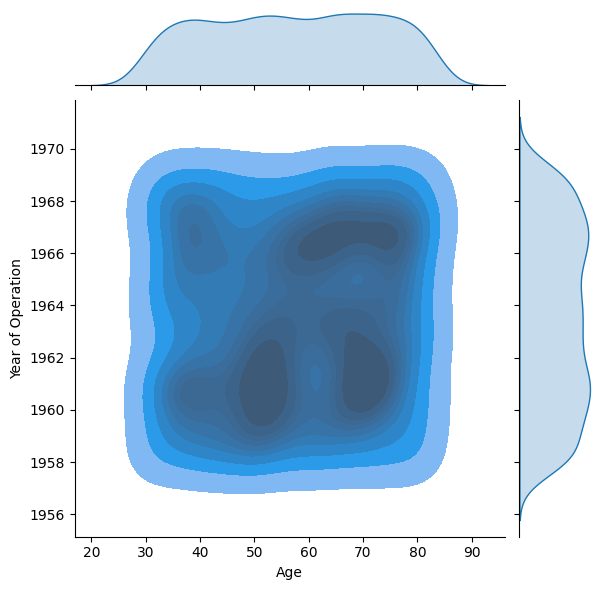

In [36]:
sns.jointplot(x = 'Age',  y = 'Year of Operation' , data = df,  kind = 'kde', fill = True)
plt.show()